ЕГОРОВ Д.А.
____
18-АС
____
2 ВАРИАНТ

Проверка модели видеокарты

In [ ]:
!nvidia-smi

Mon Nov 16 15:01:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Загрузка набора данных CIFAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import cifar10 as cifar

(x_train, y_train), (x_test, y_test) = cifar.load_data()

Выделение валидационных данных

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

Вывод нескольких изображений из тренировочного набора

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import random

NUM_PICS = 10
ALL_PICS = x_train.shape[0]
i = random.randint(0,ALL_PICS - NUM_PICS)
for k in range(NUM_PICS):
  picture = x_train[i]
  plt.figure(k)
  imgplot = plt.imshow(image.array_to_img(picture))
  i += 1

plt.show()

Предобработка данных

In [ ]:
# преобразование признаков в категориальные (one-hot)
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

x_train.astype('float32')
x_val.astype('float32')
x_test.astype('float32')

y_train.astype('float32')
y_val.astype('float32')
y_test.astype('float32')

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(f'x_train shape is {x_train.shape}')
print(f'x_val shape is {x_val.shape}')
print(f'x_test shape is {x_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')

x_train shape is (35000, 32, 32, 3)
x_val shape is (15000, 32, 32, 3)
x_test shape is (10000, 32, 32, 3)
y_train shape is (35000, 10)
y_val shape is (15000, 10)
y_test shape is (10000, 10)


Загрузка предустановленной VGG16

In [ ]:
from keras.applications import VGG16
from keras.optimizers import Adam

vgg16 = VGG16(
    weights='imagenet',
    include_top=True
)
vgg16.summary()
vgg16.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_layers = vgg16.layers

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Изображение архитектуры импортированной модели

In [ ]:
!pip install -U pydot-ng, graphviz

import cv2
from google.colab.patches import cv2_imshow
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)  
cv2_imshow(cv2.imread('model.png'))

# Создание VGG16 вручную

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# блок 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# блок 5
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# блок 6
model.add(Flatten())
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

Изображение архитектуры созданной вручную модели

ERROR: Invalid requirement: 'pydot-ng,'


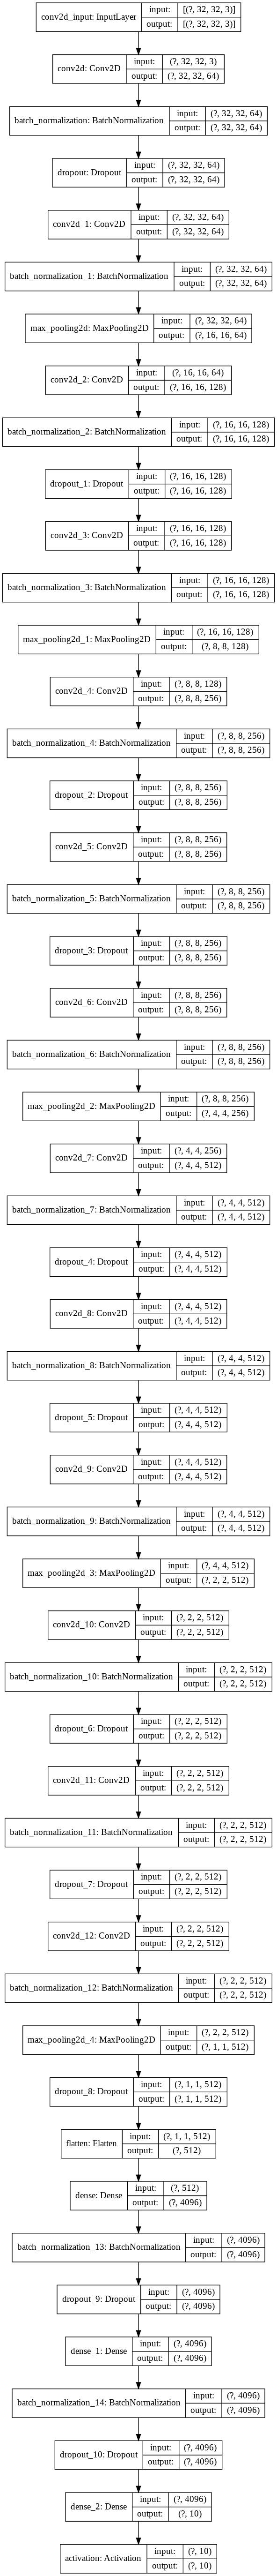

In [ ]:
!pip install -U pydot-ng, graphviz

import cv2
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

# изображение рендериться в файл, так что вывести его можно через OpenCV
# show_shapes указывает, надо ли рядом с слоями писать их размер
plot_model(model, to_file='model.png', show_shapes=True)  

cv2_imshow(cv2.imread('model.png'))

In [ ]:
import keras.optimizers as optimizers

learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Тренировка модели без аугментации

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2
).history

Epoch 1/100
875/875 [==============================] - 95s 109ms/step - loss: 2.3149 - accuracy: 0.5744 - val_loss: 2.3653 - val_accuracy: 0.5737
Epoch 2/100
875/875 [==============================] - 95s 108ms/step - loss: 2.3080 - accuracy: 0.6161 - val_loss: 2.3213 - val_accuracy: 0.6004
Epoch 3/100
875/875 [==============================] - 95s 109ms/step - loss: 2.2709 - accuracy: 0.6322 - val_loss: 2.1796 - val_accuracy: 0.6474
Epoch 4/100
875/875 [==============================] - 95s 108ms/step - loss: 2.2034 - accuracy: 0.6439 - val_loss: 2.2633 - val_accuracy: 0.6180
Epoch 5/100
875/875 [==============================] - 95s 108ms/step - loss: 2.1628 - accuracy: 0.6495 - val_loss: 2.1151 - val_accuracy: 0.6514
Epoch 6/100
875/875 [==============================] - 95s 108ms/step - loss: 2.1090 - accuracy: 0.6571 - val_loss: 2.1561 - val_accuracy: 0.6191
Epoch 7/100
875/875 [==============================] - 95s 108ms/step - loss: 2.0651 - accuracy: 0.6631 - val_loss: 2.1650 -

Сохранение модели без аугментации


In [ ]:
model.save('/content/drive/My Drive/Лабы ИАД/weights/without_augmentation.h5')

График тренировки без аугментации

In [ ]:
# так как полученные выше графики искажены помехами (острые вершины на всем
#                                                    протяжении графика)
# необходимо сгладить их и заменить реальные значения ЭКСПОНЕНЦИАЛЬНО СКОЛЬЗЯЩИМ СРЕДНИМ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history)

# Создание генераторов

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        # установка среднего значение входных данных на 0
        featurewise_center=False,
        # установка среднего каждого образца на 0
        samplewise_center=False, 
        # деление входных данных на их среднее
        featurewise_std_normalization=False,
        # деление каждого образца на его среднее
        samplewise_std_normalization=False,
        # вращение в пределах 40 градусов
        rotation_range=40,
        # изменение ширины
        width_shift_range=0.2,
        # изменение высоты
        height_shift_range=0.2,
        # сдвиг вбок
        shear_range=0.2,
        # увеличение изображения
        zoom_range=0.2,
        # поворот вокруг горизонтальной оси
        horizontal_flip=True,
        # поворот вокруг вертикальной оси
        vertical_flip=False, 
        fill_mode='nearest',
        # приводит значения пикселей к промежутку от 0 до 1
        rescale=1./255
)

# константы для тренировки
batch_size = 32
epochs = 50

# создание трех отдельных генераторов на основе предыдущего

# тренировочный генератор применяет аугментацию
train_generator = datagen
train_generator.fit(x_train)
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
# проверочный и тестовый - не меняют фото, а только приводят пиксели к промежутку от 0 до 1
val_generator = ImageDataGenerator(rescale=1./255)
val_generator.fit(x_val)
val_generator = val_generator.flow(x_val, y_val, batch_size=batch_size)
test_generator = ImageDataGenerator(rescale=1./255)
test_generator.fit(x_test)
test_generator = test_generator.flow(x_test, y_test, batch_size=batch_size)


# Тренировка модели с генератором с аугментацией



In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

Epoch 1/50
1093/1093 [==============================] - 99s 91ms/step - loss: 82.6948 - accuracy: 0.1022 - val_loss: 61.3941 - val_accuracy: 0.0878
Epoch 2/50
1093/1093 [==============================] - 99s 91ms/step - loss: 57.8394 - accuracy: 0.1068 - val_loss: 29.2144 - val_accuracy: 0.1095
Epoch 3/50
1093/1093 [==============================] - 99s 90ms/step - loss: 17.5333 - accuracy: 0.1230 - val_loss: 10.8759 - val_accuracy: 0.1044
Epoch 4/50
1093/1093 [==============================] - 99s 90ms/step - loss: 12.9545 - accuracy: 0.1274 - val_loss: 29.4973 - val_accuracy: 0.1036
Epoch 5/50
1093/1093 [==============================] - 99s 90ms/step - loss: 24.0436 - accuracy: 0.1127 - val_loss: 17.3181 - val_accuracy: 0.1005
Epoch 6/50
1093/1093 [==============================] - 99s 90ms/step - loss: 11.4332 - accuracy: 0.1093 - val_loss: 8.2362 - val_accuracy: 0.1472
Epoch 7/50
1093/1093 [==============================] - 99s 90ms/step - loss: 5.5707 - accuracy: 0.1498 - val_los

Сохранение модели с аугментацией


In [ ]:
model.save('/content/drive/My Drive/Лабы ИАД/weights/with_augmentation.h5')

График тренировки с аугментацией

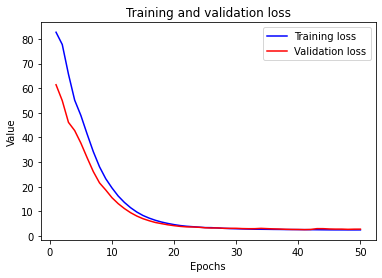

In [ ]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history)

Загрузка ранее натренированных весов

In [ ]:
from keras.models import load_model
raw_model = load_model('/content/drive/My Drive/Лабы ИАД/weights/without_augmentation.h5')
aug_model = load_model('/content/drive/My Drive/Лабы ИАД/weights/with_augmentation.h5')

Нахождение лучшей сети

In [ ]:
(raw_loss, raw_accuracy) = raw_model.evaluate(test_generator, verbose=1)
print(f'Raw Loss is {raw_loss}')
print(f'Raw Accuracy is {raw_accuracy}\n')

(aug_loss, aug_accuracy) = aug_model.evaluate(test_generator, verbose=1)
print(f'Aug Loss is {aug_loss}')
print(f'Aug Accuracy is {aug_accuracy}')

name = None

if aug_accuracy > raw_accuracy:
  best_model = aug_model
  name = "augmentation"
elif raw_accuracy > aug_accuracy:
  best_model = raw_model
  name = 'raw'

print(f'best model is {name} model')

313/313 [==============================] - 7s 24ms/step - loss: 2.8379 - accuracy: 0.1694
Raw Loss is 2.8379008769989014
Raw Accuracy is 0.16940000653266907

313/313 [==============================] - 7s 23ms/step - loss: 4.0588 - accuracy: 0.0970
Aug Loss is 4.058791160583496
Aug Accuracy is 0.09700000286102295
best model is raw model


# ======================================================================

# Создание новой архитектуры: вариант 1

Оставил блоки 1, 2, 3

(accuracy = 0.7168)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)      

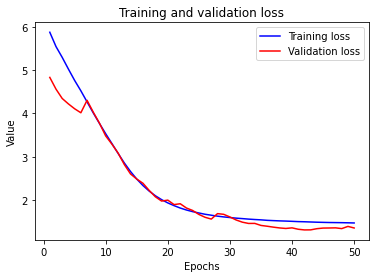

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_1 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_1.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# блок 4
model_1.add(Flatten())
model_1.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.summary()

model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_1.save('/content/drive/My Drive/Лабы ИАД/weights/model_1.h5')

# ОЦЕНКА
(loss_1, accuracy_1) = model_1.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_1}')
print(f'Accuracy is {accuracy_1}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_1)

# Создание новой архитектуры: вариант 2

Оставил блоки 1, 2

(accuracy = 0.7433)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_2 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_2.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.3))
model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_2.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))
model_2.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# блок 6
model_2.add(Flatten())
model_2.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_2.save('/content/drive/My Drive/Лабы ИАД/weights/model_2.h5')


# ОЦЕНКА
(loss_2, accuracy_2) = model_2.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_2}')
print(f'Accuracy is {accuracy_2}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_2)

# Создание новой архитектуры: вариант 3

Повтор блока 1 три раза

(accuracy =  0.7253)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers
import matplotlib.pyplot as plt

model_3 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_3.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_3.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_3.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

# блок 4
model_3.add(Flatten())
model_3.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# # ТРЕНИРОВКА
history_3 = model_3.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_3.save('/content/drive/My Drive/Лабы ИАД/weights/model_3.h5')

# ОЦЕНКА
(loss_3, accuracy_3) = model_3.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_3}')
print(f'Accuracy is {accuracy_3}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_3)

# Создание новой архитектуры: вариант 4

Оставил блоки 1, 3

(accuracy = 0.7123)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_4 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_4.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))


# блок 2
model_4.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.4))
model_4.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.4))
model_4.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_4.add(Flatten())
model_4.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

model_4.summary()

model_4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_4 = model_4.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_4.save('/content/drive/My Drive/Лабы ИАД/weights/model_4.h5')

# ОЦЕНКА
(loss_4, accuracy_4) = model_4.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_4}')
print(f'Accuracy is {accuracy_4}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_4)

# Создание новой архитектуры: вариант 5

Оставил блоки 1,2 и три блока 5 (в двух удален pooling)

(accuracy = 0.5168)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers
import matplotlib.pyplot as plt


model_5 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_5.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.3))
model_5.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_5.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_5.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# блок 4
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# блок 5
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.5))

# блок 6
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

# блок 7
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.4))
model_5.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

# блок 8
model_5.add(Flatten())
model_5.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
model_5.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

model_5.summary()

model_5.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_5 = model_5.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_5.save('/content/drive/My Drive/Лабы ИАД/weights/model_5.h5')

# ОЦЕНКА
(loss_5, accuracy_5) = model_5.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_5}')
print(f'Accuracy is {accuracy_5}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_5)

# Создание новой архитектуры: вариант 6

Оставил два блока 3

(accuracy = 0.7213)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_6 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_6.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_6.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.3))
model_6.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_6.add(Flatten())
model_6.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.5))
model_6.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_6.add(BatchNormalization())
model_6.add(Dropout(0.5))
model_6.add(Dense(10))
model_6.add(Activation('softmax'))

model_6.summary()

model_6.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_6 = model_6.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_6.save('/content/drive/My Drive/Лабы ИАД/weights/model_6.h5')

# ОЦЕНКА
(loss_6, accuracy_6) = model_6.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_6}')
print(f'Accuracy is {accuracy_6}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_6)

# Создание новой архитектуры: вариант 7

Оставил блоки 1, 2

(accuracy = 0.7225)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_7 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_7.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.4))
model_7.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2, 2)))

# блок 2
model_7.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.4))
model_7.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_7.add(Flatten())
model_7.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_7.add(BatchNormalization())
model_7.add(Dropout(0.5))
model_7.add(Dense(10))
model_7.add(Activation('softmax'))

model_7.summary()

model_7.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_7 = model_7.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_7.save('/content/drive/My Drive/Лабы ИАД/weights/model_7.h5')

# ОЦЕНКА
(loss_7, accuracy_7) = model_7.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_7}')
print(f'Accuracy is {accuracy_7}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_7)

# Создание новой архитектуры: вариант 8

Оставил только блок 1

(accuracy = 0.1446)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import keras.regularizers as regularizers

model_8 = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

# блок 1
model_8.add(Conv2D(64, (3, 3), padding='same', input_shape=x_shape, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.4))
model_8.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_8.add(BatchNormalization())
model_8.add(MaxPooling2D(pool_size=(2, 2)))

# блок 3
model_8.add(Flatten())
model_8.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.5))
model_8.add(Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_8.add(BatchNormalization())
model_8.add(Dropout(0.5))
model_8.add(Dense(10))
model_8.add(Activation('softmax'))

model_8.summary()

model_8.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ТРЕНИРОВКА
history_8 = model_8.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_8.save('/content/drive/My Drive/Лабы ИАД/weights/model_8.h5')

# ОЦЕНКА
(loss_8, accuracy_8) = model_8.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_8}')
print(f'Accuracy is {accuracy_8}')

# ГРАФИКИ
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

def draw_smooth_graph(history):
    loss_values = history["loss"]
    validation_loss_values = history["val_loss"]

    epochs = range(1, len(history['loss']) + 1)

    plt.plot(epochs, smooth_curve(loss_values), 'b', label='Training loss')
    plt.plot(epochs, smooth_curve(validation_loss_values), 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

draw_smooth_graph(history_8)

# ======================================================================

Загрузка всех моделей

In [ ]:
from keras.models import load_model
raw_model = load_model('/content/drive/My Drive/Лабы ИАД/weights/with_augmentation.h5')
aug_model = load_model('/content/drive/My Drive/Лабы ИАД/weights/without_augmentation.h5')
model_1 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_1.h5')
model_2 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_2.h5')
model_3 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_3.h5')
model_4 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_4.h5')
model_5 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_5.h5')
model_6 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_6.h5')
model_7 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_7.h5')
model_8 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_8.h5')
all_models = [raw_model, aug_model, model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8]
names = ['raw_model', 'aug_model', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8']

# Нахождение лучшей из архитектур

In [ ]:
max_accuracy = 0
best_model = None
for model_name, model in zip(names, all_models):
  print(f'Evaluating model: {model_name}')
  (loss, accuracy) = model.evaluate(test_generator, verbose=1)
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_model = model_name
if best_model is not None:
  print(f'Best model is {best_model}. It has an accuracy of {max_accuracy}')
  best_model = all_models[names.index(best_model)]

Evaluating model: raw_model
313/313 [==============================] - 7s 23ms/step - loss: 2.8379 - accuracy: 0.1694
Evaluating model: aug_model
313/313 [==============================] - 7s 23ms/step - loss: 4.0588 - accuracy: 0.0970
Evaluating model: model_1
313/313 [==============================] - 5s 15ms/step - loss: 1.2236 - accuracy: 0.7169
Evaluating model: model_2
313/313 [==============================] - 4s 14ms/step - loss: 1.9389 - accuracy: 0.5973
Evaluating model: model_3
313/313 [==============================] - 4s 12ms/step - loss: 1.7721 - accuracy: 0.6070
Evaluating model: model_4
313/313 [==============================] - 8s 24ms/step - loss: 1.7779 - accuracy: 0.6107
Evaluating model: model_5
313/313 [==============================] - 11s 34ms/step - loss: 2.8730 - accuracy: 0.1285
Evaluating model: model_6
313/313 [==============================] - 4s 13ms/step - loss: 1.7675 - accuracy: 0.6265
Evaluating model: model_7
313/313 [==============================] 

График зависимости точности предсказаний от количества слоев

Requirement already up-to-date: pygal in /usr/local/lib/python3.6/dist-packages (2.4.0)
     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 71kB 4.4MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89548 sha256=b234a525cd635b13990992af23989e5a2f4d8e8d8bf6f9fea857a8237dcb3b5e
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


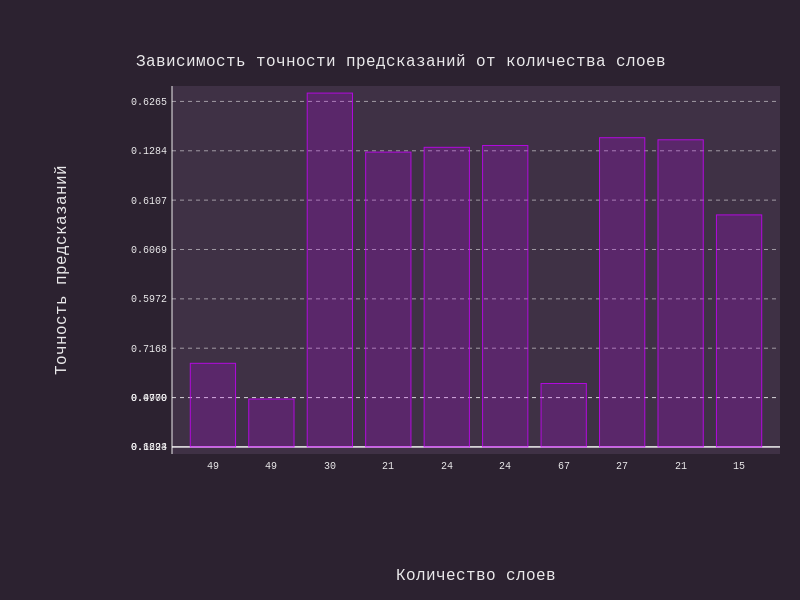

In [ ]:
!pip install -U pygal
!pip install -U cairosvg
import pygal
from pygal.style import DarkColorizedStyle
from google.colab.patches import cv2_imshow
import cv2 as cv


models_length= [len(model.layers) for model in all_models]
models_accuracies = [model.evaluate(test_generator, verbose=0)[1] for model in all_models]

hist = pygal.Bar(style=DarkColorizedStyle, show_legend=False, spacing=50) # необходимо для рисования столбцов
hist.title = "Зависимость точности предсказаний от количества слоев"
hist.x_labels = models_length
hist.y_labels = [str(acc)[:6] for acc in models_accuracies]
hist.x_title = "Количество слоев"
hist.y_title = "Точность предсказаний"

hist.add('', models_accuracies)
hist.render_to_png('histogram.png')

img = cv.imread('/content/histogram.png')
cv2_imshow(img)

# Предсказание лучшей модели

Предсказание без шума

Top 1 prediction is dog (100.0%) (on standart picture)


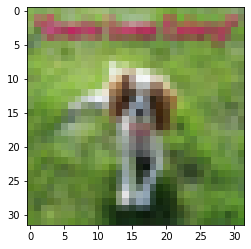

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

img = x_train[random.randint(0, len(x_train)-1)]
img = np.expand_dims(img, axis=0)

# создание копии фотографии для вывода на экран
img_to_show = img.copy().astype('float32')
img_to_show /= 255
plt.imshow(img_to_show[0])

classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predictions = list(best_model.predict(img)[0])
sorted_predictions = sorted(predictions)[::-1]
for i, pred in enumerate(sorted_predictions):
  if (i <= 2) and (pred != 0.):
    print(f'Top {i+1} prediction is {classes[predictions.index(pred)]} ({str(pred*100)[:5]}%) (on standart picture)')


Предсказание на зашумленном изображении

Top 1 prediction is dog (100.0%) (on noisy picture)


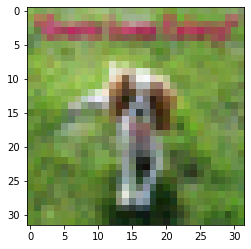

In [ ]:
# SNR- отношения сигнала к шуму
def apply_noise(img, SNR=5):
  # возведение каждого пикселя в квадрат (квадрат мощности сигнала)
  signal_power = np.square(img)
  # получение средней мощности сигнала
  signal_average_power = np.mean(signal_power)
  # максимальная амплитуда шума
  max_noise = signal_average_power / SNR
  # среднее значение шума
  mean_noise = 0
  # шум со средним значением = 0 и стандартным отклонением корень(шум)
  noise = np.random.normal(mean_noise, np.sqrt(max_noise), size = img.shape)
  # наложение шума на фото
  noised_img = img + noise
  return noised_img

noised_img = apply_noise(img, 5)

img_to_show = noised_img.copy()
img_to_show /= 255
plt.imshow(img_to_show[0])

classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predictions = list(best_model.predict(noised_img)[0])
sorted_predictions = sorted(predictions)[::-1]
for i, pred in enumerate(sorted_predictions):
  if (i <= 2) and (pred != 0.):
    print(f'Top {i+1} prediction is {classes[predictions.index(pred)]} ({str(pred*100)[:5]}%) (on noisy picture)')


# Подсчет точности на всем зашумленном датасете

In [ ]:
def apply_noise_on_dataset(data):
  noisy_data = np.zeros((data.shape))
  i = 0
  for img in data:
    noisy_img = apply_noise(img, 5)
    noisy_data[i] = noisy_img
    i += 1
  return noisy_data

# создание генератора с шумом
noisy_test_generator = ImageDataGenerator(rescale=1./255)
noisy_test_generator = noisy_test_generator.flow(apply_noise_on_dataset(x_test), y_test, batch_size=32)

(loss, accuracy) = best_model.evaluate(test_generator,verbose=1)
print(f'On raw dataset accuracy is {accuracy}')

(loss, accuracy) = best_model.evaluate(noisy_test_generator, verbose=1)
print(f'On noisy dataset accuracy is {accuracy}')



313/313 [==============================] - 5s 15ms/step - loss: 1.2236 - accuracy: 0.7169
On raw dataset accuracy is 0.7168999910354614
313/313 [==============================] - 5s 15ms/step - loss: 1.3420 - accuracy: 0.6811
On noisy dataset accuracy is 0.6811000108718872


Создание модели с несколькими выходами

In [ ]:
from keras.models import Model

# извлечение вывода всех слоев лучшей модели
layer_outputs = [layer.output for layer in best_model.layers]
activation_model = Model(inputs=best_model.input, outputs=layer_outputs)

# Карты признаков слоев лучшей сети

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


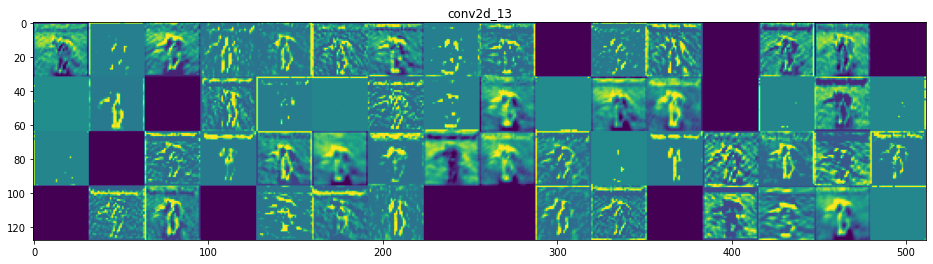

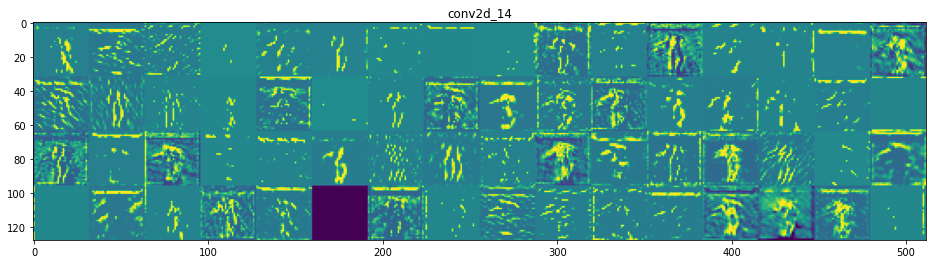

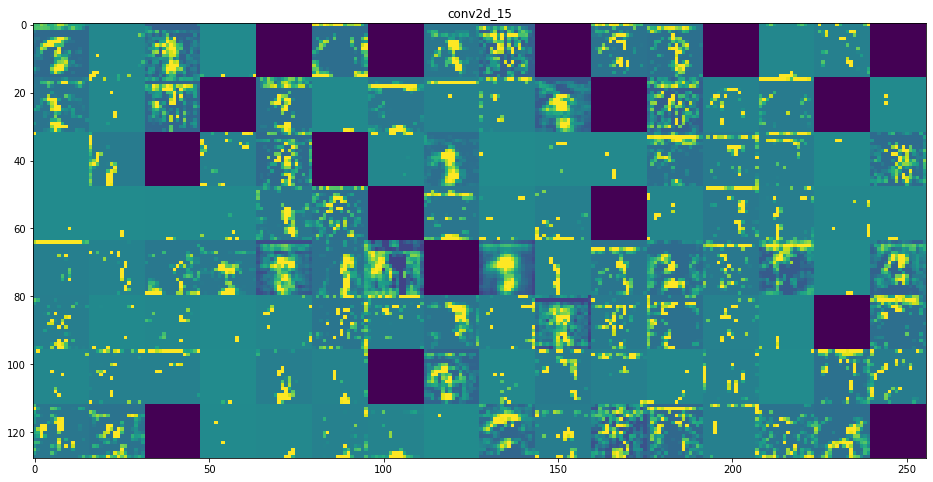

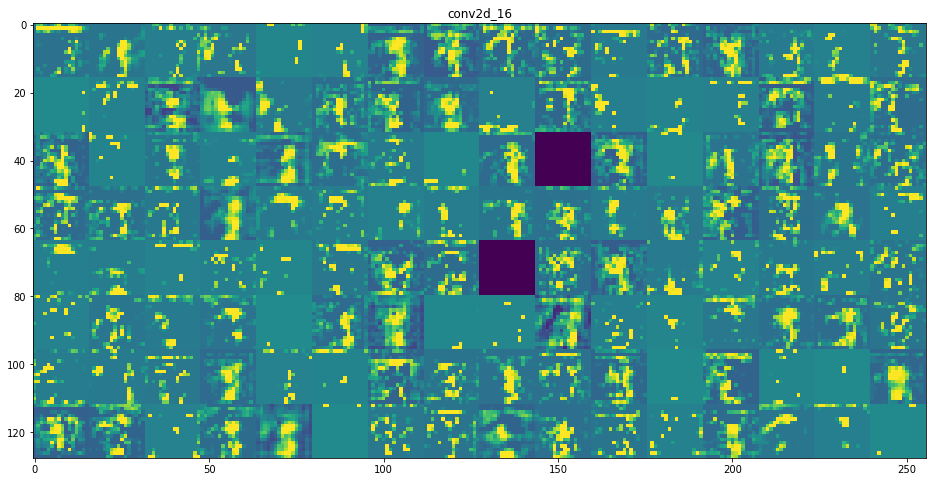

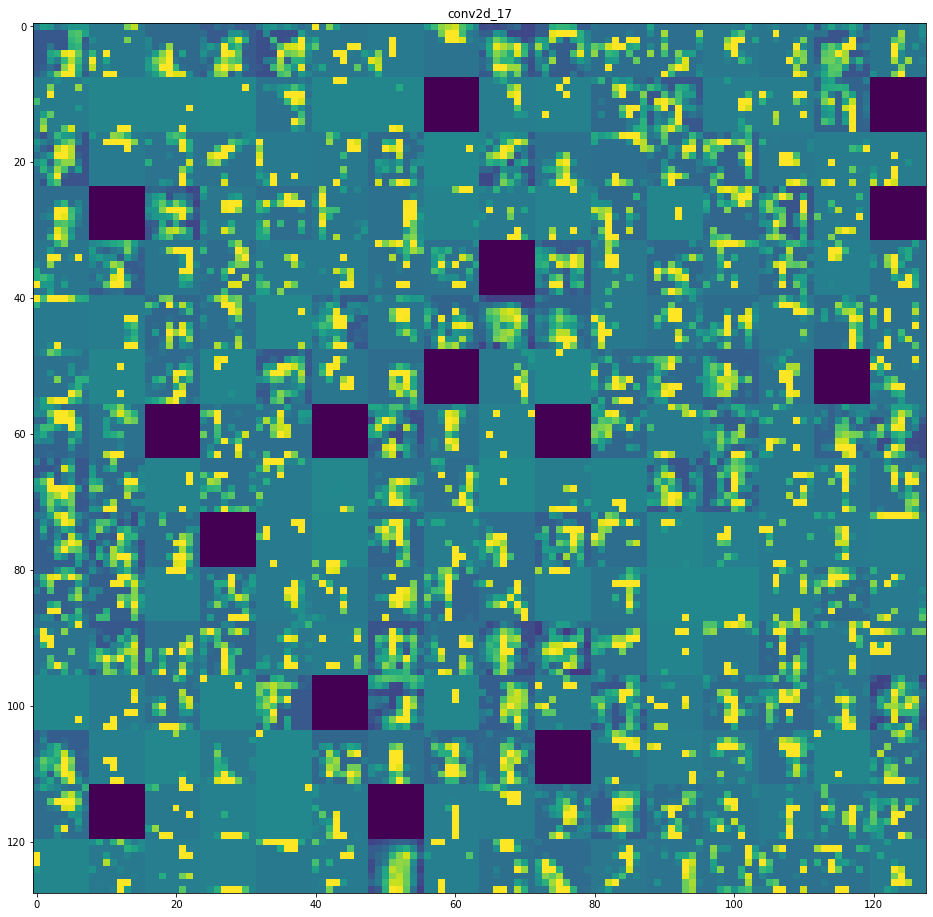

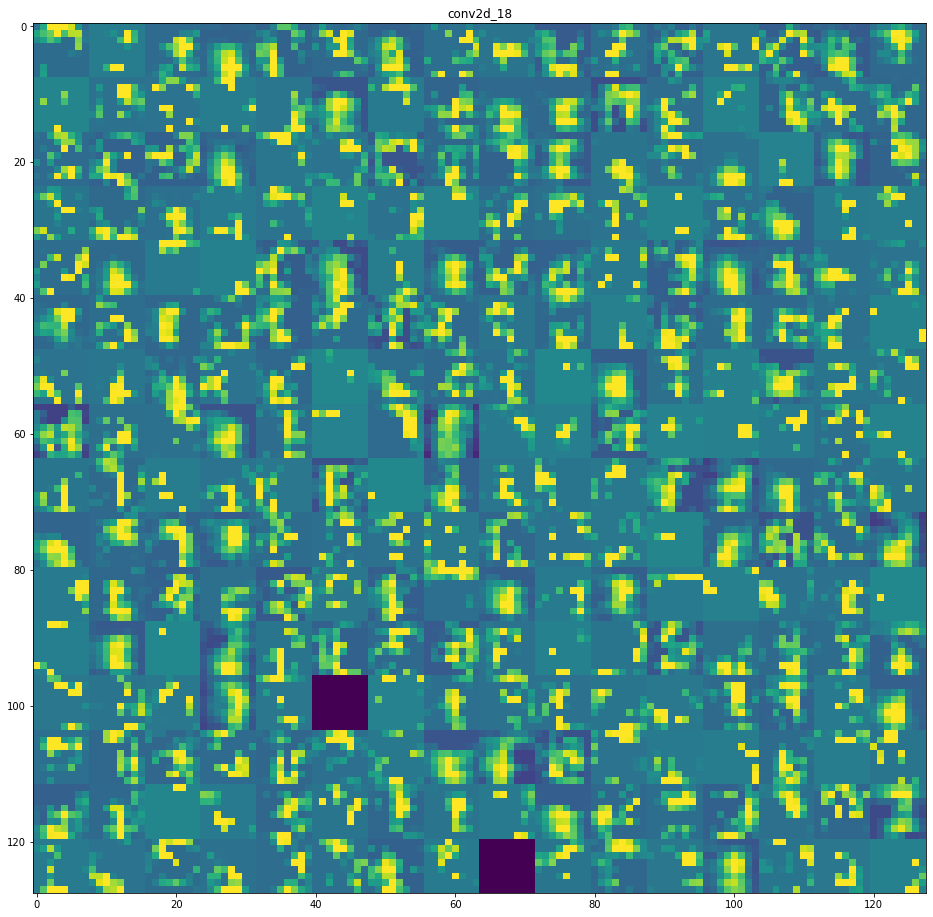

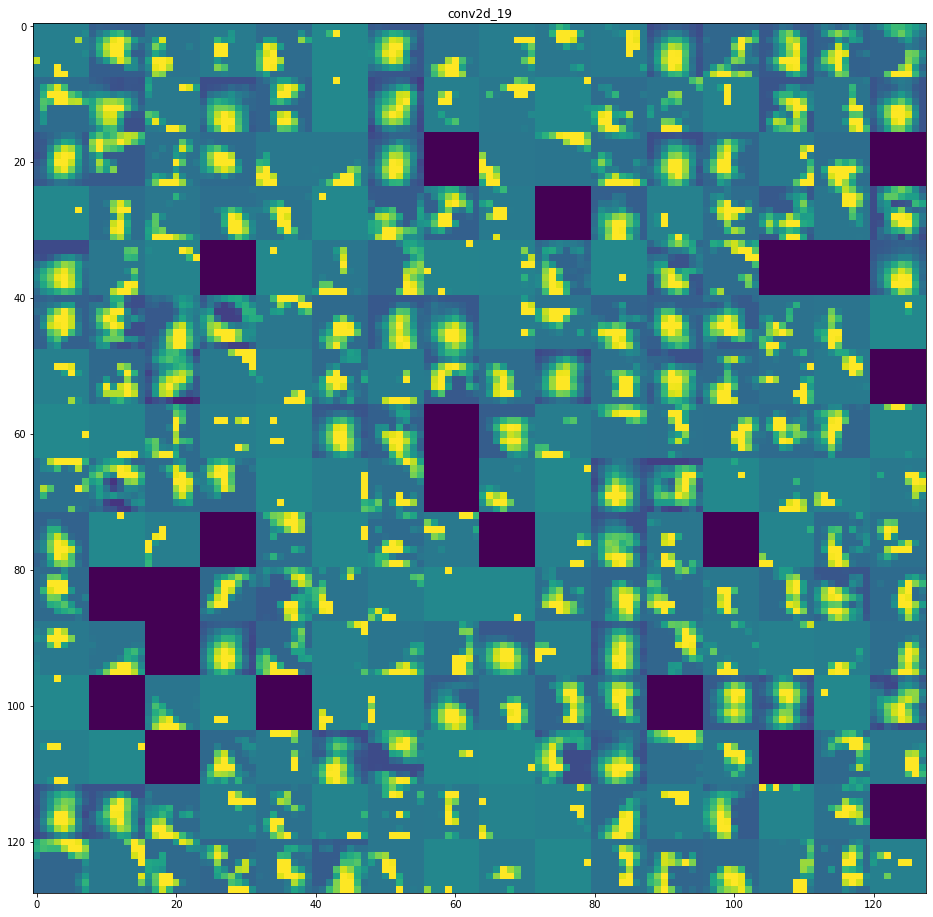

In [ ]:
best_model.summary()

# получения нескольких выходов на предсказании
activations = activation_model.predict(img)
# список всех слоев сети
layer_names = [layer.name for layer in best_model.layers]


# так как карта признаков извлекает 32 * k признаков, то берем число, которому
# 32 кратно просто для красоты
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  # выводить необходимо только сверточные слои
  if 'conv' not in layer_name:
    continue
  # карта признаков имеет форму (1, size, size, n_features)
  # берем только последнюю ось тензора
  n_features = layer_activation.shape[-1]
  # берем только первую ось тензора
  size = layer_activation.shape[1]

  # количество строчек в таблице отображений
  n_cols = n_features // images_per_row
  # сама таблица инициализируется нулями
  display_grid = np.zeros((size * n_cols, size * images_per_row))

  # обычный вложенный цикл, как в двумерной матрице
  for col in range(n_cols):
    for row in range(images_per_row):
      # это - каждый маленький квадрат в таблице отображений
      # берется каждый признак из последней оси активации (которая кратна 32)
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
      # обработка изображения для приемлемого вида
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
  
  # size - размер каждого квадратного изображения без уменьшения
  scale = 1. / size
  # уменьшаем размер общей сетки отображений, чтобы все картинки поместились на ней
  plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Матрицы свертки слоев лучшей сети

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()



layer: conv2d_13, filters: 6


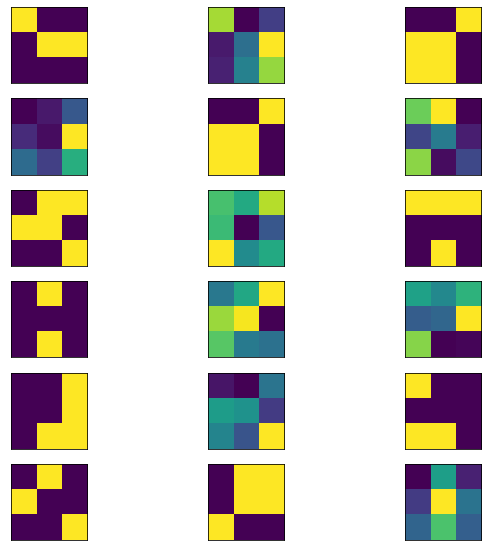


layer: conv2d_14, filters: 6


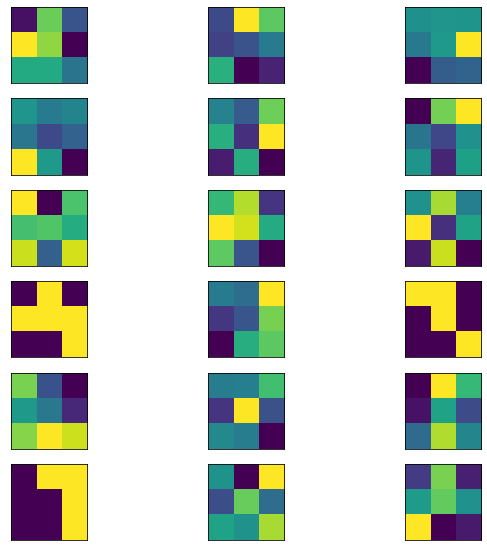


layer: conv2d_15, filters: 6


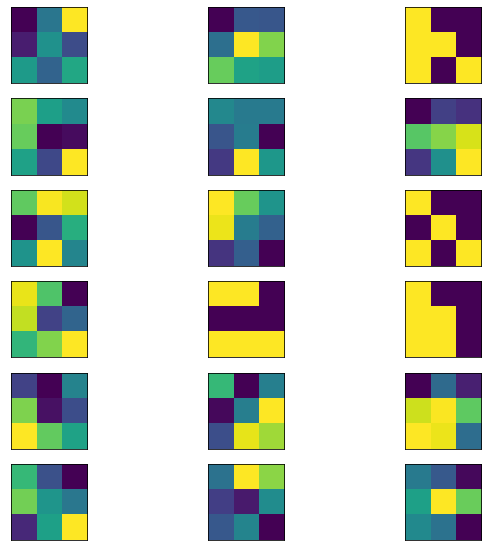


layer: conv2d_16, filters: 6


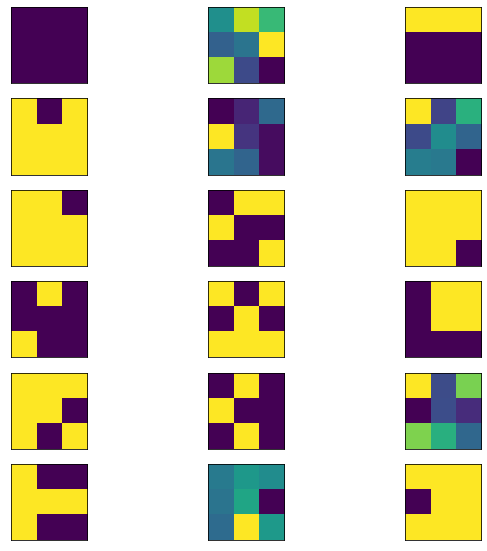


layer: conv2d_17, filters: 6


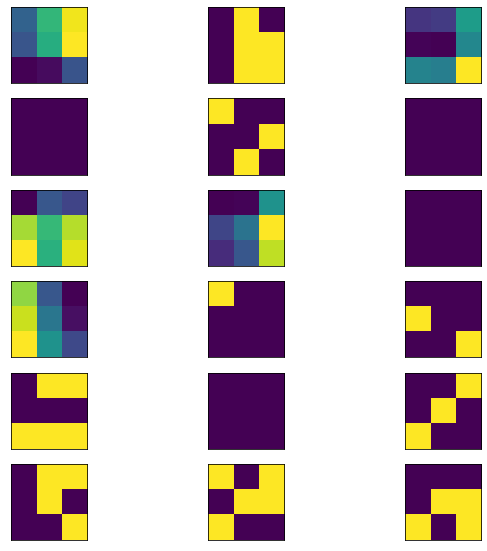


layer: conv2d_18, filters: 6


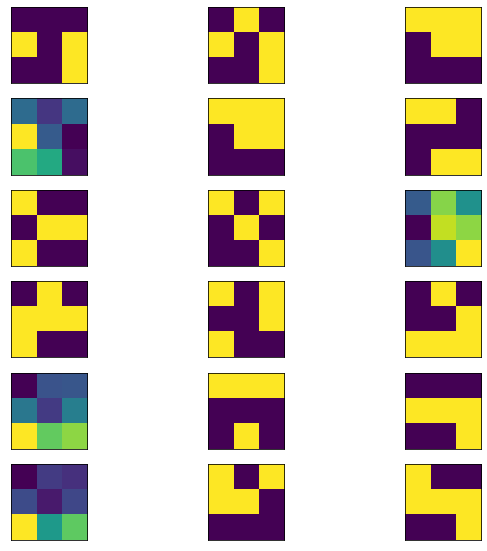


layer: conv2d_19, filters: 6


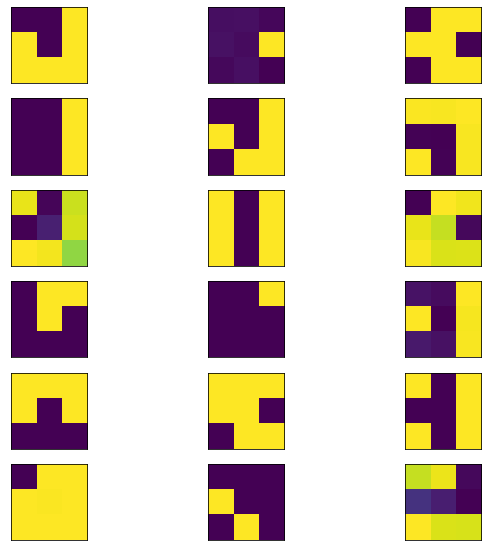

In [ ]:
# Функция принимает модель, название слоя, количество фильтров
# Функция выводит изображения указанного количество фильтров слоя
# Каждая строка - один фильтр, каждый столбец - один канал
def visualise_layer_filters(model, layer_name, num_filters):
  import matplotlib.pyplot as plt
  layer = model.get_layer(layer_name)
  layer_filters, _ = layer.get_weights()
  # число каналов (столбцов)
  channels = 3
  # число ячеек
  num_cells = channels * num_filters
  place = plt.figure(figsize=(10, 30))
  for i in range(1, num_cells + 1):
    f = layer_filters[:, :, :, i-1]
    for j in range(channels):
      fig = place.add_subplot(num_cells, channels, i)
      # отключение осей
      fig.set_xticks([]) 
      fig.set_yticks([])
      # показываем фильтры для всех трех каналов по очереди
      plt.imshow(f[:, :, j], cmap='viridis')
  print(f'\nlayer: {layer_name}, filters: {num_filters}')    
  plt.show()    

for layer in best_model.layers:
  if 'conv' in layer.name:
    visualise_layer_filters(best_model, layer.name, 6)

# ======================================================================

# Сравнение с существующим решением

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

base_model = VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

model_9 = Sequential()
model_9.add(base_model)
model_9.add(Flatten())
# в этом варианте отличается количество нейронов в последних слоях
# а также количество полносвязных слоев
model_9.add(Dense(1024,activation=('relu'),input_dim=512))
model_9.add(Dense(512,activation=('relu'))) 
model_9.add(Dense(256,activation=('relu'))) 
model_9.add(Dense(128,activation=('relu')))
model_9.add(Dense(10,activation=('softmax')))
model_9.summary()

# больше размер пакета
batch_size= 100
# меньше эпох тренировки
epochs=50

# не базовый оптимизатор
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)

model_9.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

history_9 = model_9.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=250
).history

# СОХРАНЕНИЕ ВЕСОВ
model_9.save('/content/drive/My Drive/Лабы ИАД/weights/model_9.h5')

# ОЦЕНКА
(loss_9, accuracy_9) = model_9.evaluate(test_generator, verbose=1)
print(f'Loss is {loss_9}')
print(f'Accuracy is {accuracy_9}')

# создается два графических окна - одно над другим
f,ax=plt.subplots(2,1)

ax[0].plot(history_9['loss'],color='b',label='Training Loss')
ax[0].plot(history_9['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(history_9['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history_9['val_accuracy'],color='r',label='Validation Accuracy')


Предсказание чужой модели

Top 1 prediction is dog (100.0%) (on standart picture)


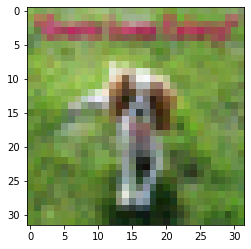

In [ ]:
from keras.models import load_model
import random
import numpy as np
import matplotlib.pyplot as plt

model_9 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_9.h5')

# создание копии фотографии для вывода на экран
plt.imshow(img_to_show[0])

classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predictions = list(model_9.predict(img)[0])
sorted_predictions = sorted(predictions)[::-1]
for i, pred in enumerate(sorted_predictions):
  if (i <= 2) and (pred != 0.):
    print(f'Top {i+1} prediction is {classes[predictions.index(pred)]} ({str(pred*100)[:5]}%) (on standart picture)')


Подсчет точности предсказаний чужой модели на всем датасете

In [ ]:
model_9 = load_model('/content/drive/My Drive/Лабы ИАД/weights/model_9.h5')

def apply_noise_on_dataset(data):
  noisy_data = np.zeros((data.shape))
  i = 0
  for img in data:
    noisy_img = apply_noise(img, 5)
    noisy_data[i] = noisy_img
    i += 1
  return noisy_data

# создание генератора с шумом
noisy_test_generator = ImageDataGenerator(rescale=1./255)
noisy_test_generator = noisy_test_generator.flow(apply_noise_on_dataset(x_test), y_test, batch_size=32)

(loss, accuracy) = model_9.evaluate(test_generator,verbose=1)
print(f'On raw dataset accuracy is {accuracy}')

(loss, accuracy) = model_9.evaluate(noisy_test_generator, verbose=1)
print(f'On noisy dataset accuracy is {accuracy}')


313/313 [==============================] - 5s 17ms/step - loss: 0.4693 - accuracy: 0.8387
On raw dataset accuracy is 0.838699996471405
313/313 [==============================] - 5s 17ms/step - loss: 0.4838 - accuracy: 0.8338
On noisy dataset accuracy is 0.8338000178337097
